<a href="https://colab.research.google.com/github/ColeTKrause/MAT421/blob/main/ModuleG_P2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numerical Integration Part 2

### References

**Chapter 21: Python Numerical Methods** \
https://pythonnumericalmethods.berkeley.edu/notebooks/chapter21.04-Simpsons-Rule.html



## Simpson's Rule
### Section 21.4

**Simpson's Rule** is a method for determining the area under a curve by using subsections of quadratic polynomials. From this point the quadratic polynomial is integrated exactly. The primary benefit of this approach is it is very common for unknown functions which have smooth curves and rounded points at the peaks and troughs. These smooth lines can lineup or get very close to lining up to the quadratic polynomial providing very accurate approximations of the area fewer subsections than in the Riemann's or Trapezoid approach. Now it is important to understand this requires another step of determining the quadratic polynomial approximation for the function and then performing an exact integration underneath that function. However! Interpolation is a very common method used in engineering and scientific applications and scientist are rarely provided an exact function for the problem at hand. Thus the use of Simpson's Rule can be ideal for these situations. For example the area of a segment is needed for an uncommon shape which does not have a direct geometric formula interpretation is a common problem face in mechanical engineering, biology, and many other disciplines of science. Thus using measurements, interpolating, and using Simpson's Rule to integrate can be the best approach for these applications. \
\
The method for integrating with Simpson's Rule is shown below: \
Given a function $f(x)$, approximate the area under the curve with the subintervals $[x_{i-1},x_i]$ to $[x_i, x_{i+1}]$. \

First, fit a quadratic polynomial through the points $(x_{i-1},f(x_{i-1})),(x_i,f(x_i)),(x_{i+1},f(x_{i+1}))$. The most common approach is to Lagrange Polynomial Interpolation: \
\
$P_i(x)=f(x_{i-1})\frac{(x-x_i)(x-x_{i-1})}{(x_{i-1}-x_i)(x_{i-1}-x_{i+1})}+f(x_i)\frac{(x-x_{i-1})(x-x_{i+1})}{(x_i-x_{i-1})(x_i-x{i+1})}+f(x_{i+1})\frac{(x-x_{i-1})(x-x_i)}{(x_{i+1}-x_{i-1})(x_{i+1}-x_i)}$ \
\
Using h substitution results in the following: \
$P_i(x)=\frac{f(x_{i-1})}{2h^2}(x-x_i)(x-x_{i+1})-\frac{f(x_i)}{h^2}(x-x_{i-1})(x-x_{i+1})+\frac{f(x_{i+1})}{2h^2}(x-x_{i-1})(x-x_i)$ \
\
Integrating a subinterval is as follows: \
$∫_{x_{i-1}}^{x_{i+1}}P_i(x)dx=\frac{h}{3}(f(x_{i-1})+4f(x_i)+f(x_{i+1}))$ \
\
Approximating over the entire interval is then the summation of the integration of the two subintervals:\
\
$∫_a^bf(x)dx≈\frac{h}{3}[f(x_0)+4(∑_{i=1,i odd}^{n-1}f(x_i))+x(∑_{i=2,i even}^{n-2}f(x_i))+f(x_n)]$ \
To use Simpson's rule it is imperative to have an even number of intervals. \
\
\
Determining the Accuracy of Simpson's Rule can be found by taking the Taylor series at $x_{i-1}$ and $x_{i+1}$ and substituting h. Through algebraic manipulation and simplification yields the following integral: \
\
$∫_{x_{i-1}}^{x_{i+1}}f(x)dx=\frac{h}{3}(f(x_{i-1})+4f(x_i)+f(x_{i+1}))+O(h^5)$\
This implies that Simpson's Rule is two orders of accuracy greater than Riemmans and Trapezoid! \
\
**Example Problem:** \
$f(x)=2cos(x)$ \
$∫_{-π/2}^{π/2}2cos(x)dx=4$


In [3]:
# Necessary imports
import numpy as np

# internal bounds
a = -np.pi / 2
b = np.pi / 2

# Slices and intervals
n = 11 # changing this term improves the accuracy of model
h = (b - a) / (n - 1)
x = np.linspace(a,b,n)

# function
f = 2*np.cos(x)

# Simpson's integration!
simp_integral = (h/3) * (f[0] + 2*sum(f[:n-2:2]) + 4*sum(f[1:n-1:2]) + f[n-1])
error = 4-simp_integral

# lets see the results
print(simp_integral)
print(error)

4.000219034630009
-0.00021903463000860768


## Integral Computation Using Python
### Section 21.5

While it is not always an option, Python can compute Integrals through popular libraries such as the scipy.integrate sub-package. When provided a valid function, the trapz function in scipy.integrate library is a great option for computing and observing an analytical solution for the integral. \
\
**Examples:** \
Previous Simpson's Rule example\
$f(x)=2cos(x)$ \
\
$∫_{-π/2}^{π/2}2co s(x)dx=4$ \
\
$F(x) = 2sin(x)+C$

In [4]:
# Necessary imports
import numpy as np
import scipy.integrate as integrate

# bounds
a = -np.pi / 2
b = np.pi / 2

# subsections
n = 11
h = (b - a) / (n - 1)
x = np.linspace(a,b,n)

# function and integral
f = 2*np.cos(x)
trapz_int = integrate.trapz(f,x)
simp_int = (h/3) * (f[0] + 2*sum(f[:n-2:2]) + 4*sum(f[1:n-1:2]) + f[n-1])

# lets see the results again
print(trapz_int)
print(simp_int)

3.967047075018909
4.000219034630009


When we desire to approximate the cumulative integral, ie $F(X)=∫_{x_0}^Xf(x)dx$ the $cumtrapz$ and $cumsum$ from the scipy.trapz sub-package can provide this functionality.

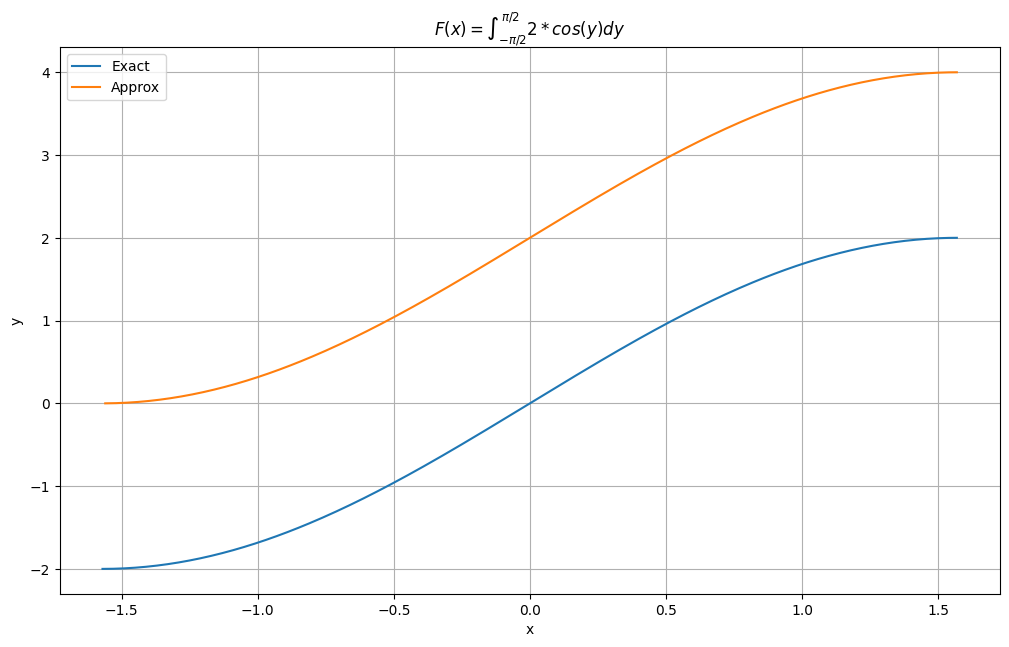

In [7]:
# Necessary imports
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt

# Exact and approximate function
x = np.arange(-np.pi / 2, np.pi /2, 0.01)
F_exact = 2*np.sin(x)
F_approx = integrate.cumtrapz(2*np.cos(x),x)

# Graphing the curves
plt.figure(figsize=(10,6))
plt.plot(x, F_exact)
plt.plot(x[1::], F_approx)
plt.grid()
plt.tight_layout()
plt.title('$F(x)=\int_{-\pi/2}^{\pi/2} 2*cos(y)dy$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['Exact', 'Approx'])
plt.show()

Another integration technique provided by the scipy.integrate sub-package is the integrate.quad function. \
**Example:** \
$f(x)=cos(x)$\
\
$∫_{-π/2}^{π/2}cos(x)dx = 2$

In [11]:
# Necessary imports
import numpy as np
import scipy.integrate as integrate

# quad sub-package example
quad_integrate, error = integrate.quad(np.cos, -np.pi/2, np.pi/2)
error_calc = 2 - quad_integrate
print(quad_integrate)
print(error_calc) # Notice the error is so low, python only provides 0


2.0
0.0
